In [1]:
!pip install opencv-python-headless


In [2]:
# This removes the CUDA lines from the file
!sed -i 's/net.setPreferableBackend.*//g' object_detection.py
!sed -i 's/net.setPreferableTarget.*//g' object_detection.py


In [3]:
import os

# Create the directory
os.makedirs("dnn_model", exist_ok=True)

# Move the file
!mv classes.txt dnn_model/


In [4]:
from object_detection import ObjectDetection
od = ObjectDetection(weights_path="yolov4.weights", cfg_path="yolov4.cfg")


Loading Object Detection
Running OpenCV DNN with YOLOv4


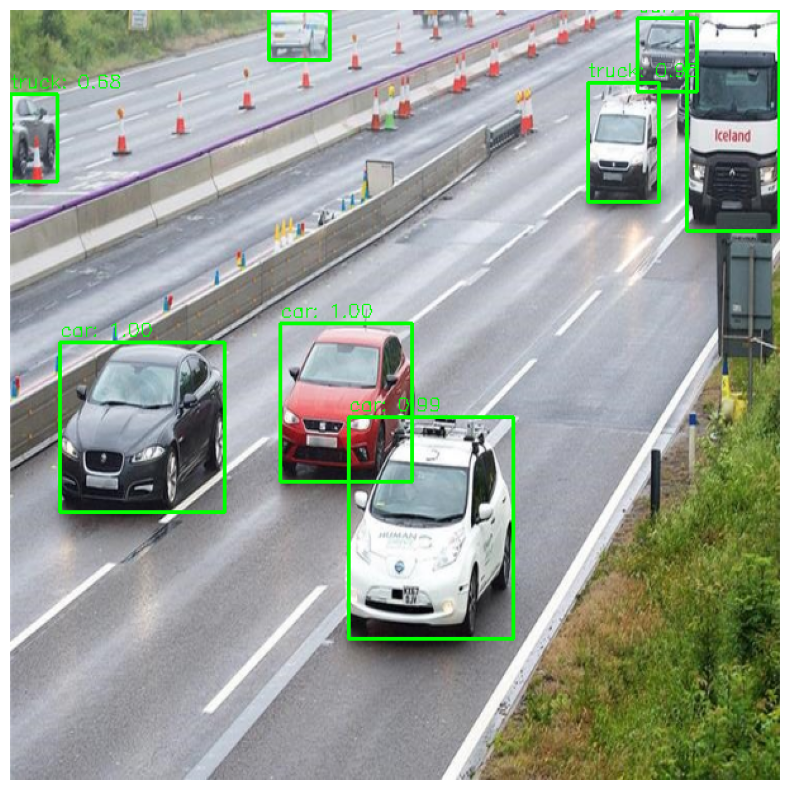

In [6]:
import cv2
from matplotlib import pyplot as plt

# Replace with your image name
image_path = "/content/WhatsApp Image 2025-04-16 at 00.01.08.jpeg"

# Read and resize to YOLO input size
image = cv2.imread(image_path)
image = cv2.resize(image, (608, 608))  # YOLOv4 input size

# Detect
results = od.detect(image)

# Draw detections
for (name, conf, box) in results:
    x, y, w, h = box
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    label = f"{name}: {conf:.2f}"
    cv2.putText(image, label, (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# Show output image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


mv: cannot stat 'classes.txt': No such file or directory
Loading Object Detection
Running OpenCV DNN with YOLOv4


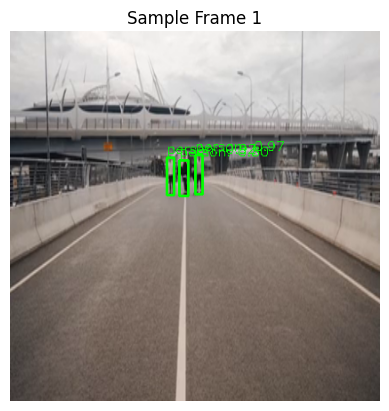

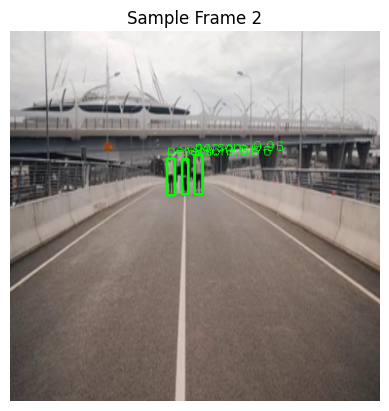

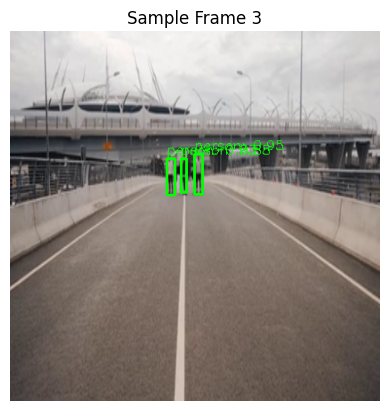

✅ Done. Processed 493 frames, wrote 98. Time taken: 213.91s


In [7]:
import cv2
from object_detection import ObjectDetection
import matplotlib.pyplot as plt
import os, time

# Setup
os.makedirs("dnn_model", exist_ok=True)
!mv yolov4.cfg dnn_model/
!mv yolov4.weights dnn_model/
!mv classes.txt dnn_model/

# Initialize model
od = ObjectDetection(
    weights_path="dnn_model/yolov4.weights",
    cfg_path="dnn_model/yolov4.cfg"
)

# Load video
video_path = "/content/WhatsApp Video 2025-04-16 at 00.01.08.mp4"  # ⬅️ Change this to match your uploaded file name
cap = cv2.VideoCapture(video_path)

# Read one frame to get dimensions
ret, frame = cap.read()
if not ret:
    raise Exception("❌ Failed to read video. Check file format or filename.")
frame_size = (416, 416)
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

# Setup video writer
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter("output.mp4", fourcc, 20.0, frame_size)

# Process video
frame_count = 0
written_count = 0
frame_skip = 5
start = time.time()

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1
    if frame_count % frame_skip != 0:
        continue

    frame = cv2.resize(frame, frame_size)
    results = od.detect(frame)

    for (name, conf, box) in results:
        x, y, w, h = box
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        label = f"{name}: {conf:.2f}"
        cv2.putText(frame, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)

    # Show first 3 processed frames in Colab
    if written_count < 3:
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.title(f"Sample Frame {written_count + 1}")
        plt.axis('off')
        plt.show()

    out.write(frame)
    written_count += 1

cap.release()
out.release()

print(f"✅ Done. Processed {frame_count} frames, wrote {written_count}. Time taken: {round(time.time() - start, 2)}s")


In [8]:
!apt-get install ffmpeg -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [9]:
!ffmpeg -i output.mp4 -vcodec libx264 -acodec aac -strict experimental output_fixed.mp4


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [10]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('output_fixed.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML(f"""
<video width=640 controls>
  <source src="{data_url}" type="video/mp4">
</video>
""")
